# 3 Variable Line Color Graph, 2D-X 2D-Y and 1D-COL-Color

**[Back to Fan's Matlab Examples Table of Content](https://fanwangecon.github.io/M4Econ/)**

Generate k + b = w, color for each w, vectors of k and b such that k + b = w for each w

There are two N by M matrix, A anb B. 

Values in Matrix A correspond to the x-axis, values in Matrix B correspond to the y-axis. 

The rows and columns in matrix A and B have some other meanings. In this case, we will give color to the columns. 

The columns is represented by vector C, which is another variable. 

1. Each line a different color representing variable 3
2. Legend labeling a subset of colors
3. X and Y could be asset choices, color could be utility, consumption etc. 

## Setting Up Data

In [19]:
close all
clear all

% Bounds
fl_b_bd = -10;
% Max and Mins
fl_w_max = 50;
fl_w_min = fl_b_bd;
fl_kp_max = fl_w_max - fl_b_bd;
fl_kp_min = 0;

% Grid Point Counts
it_w_i = 75;
it_kb_j = 75;

In [20]:
ar_lam = linspace(fl_w_min, fl_w_max, it_w_i);
ar_kp = linspace(fl_kp_min, fl_kp_max, it_kb_j);
mt_bp = ar_lam - ar_kp';
mt_kp = ar_lam - mt_bp;
mt_bl_constrained = (mt_bp < fl_b_bd);
mt_bp_wth_na = mt_bp;
mt_kp_wth_na = mt_kp;
mt_bp_wth_na(mt_bl_constrained) = nan;
mt_kp_wth_na(mt_bl_constrained) = nan;
% disp('ar_lam')
% disp(ar_lam)
% disp('ar_kp')
% disp(mt_kp_wth_na)
% disp('ar_bp: Negative means borrowing to finance kp')
% disp(mt_bp_wth_na)

## Graphing

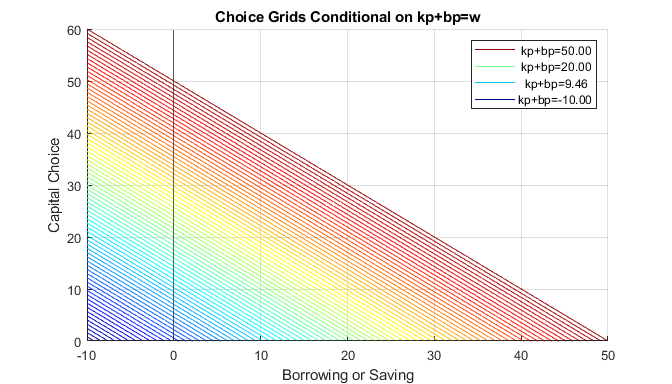

In [21]:
figure('PaperPosition', [0 0 7 4]);
hold on;

chart = plot(mt_bp_wth_na, mt_kp_wth_na, 'blue');

clr = jet(numel(chart));
for m = 1:numel(chart)
   set(chart(m),'Color',clr(m,:))
end
if (length(ar_lam) <= 10) 
    scatter(ar_bp, ar_kp, 20, 'filled');
end
xline(0);
yline(0);

title('Choice Grids Conditional on kp+bp=w')
ylabel('Capital Choice')
xlabel({'Borrowing or Saving'})
legend2plot = fliplr([1 round(numel(chart)/3) round((2*numel(chart))/4)  numel(chart)]);
legendCell = cellstr(num2str(ar_lam', 'kp+bp=%3.2f'));
legend(chart(legend2plot), legendCell(legend2plot), 'Location','northeast');

grid on;